In [71]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import os,sys
module_path = os.path.abspath(os.path.join('../../'))
sys.path.append(module_path)
from parrot.core import *
from parrot.model import *



In [4]:
base = "../"
dataset = DataSet.load(
    base + "/index/ap90",
    base + "/topics/ap90-51-100",
    base + "/qrels/ap90-51-100",
    True
)
print(dataset.collection)

Collection:../index/ap90
total_term_freq:25556408
num_docs:78583
num_terms:175559


In [74]:

models = [BM25Model(), DLMModel(),PIVModel(),NTFIDFModel()]
result_list = []
models_list = []

for model in models:
    result_set = model.run(dataset)
    print(model.get_name(), "\t", result_set.avg_prec())
    models_list.append(model.get_name())
    result_list.append(result_set.avg_prec())

BM25Model 	 0.2467660051195293
DLMModel 	 0.2206963845116881
PIVModel 	 0.2417928303150193
NTFIDFModel 	 0.2397517748904947


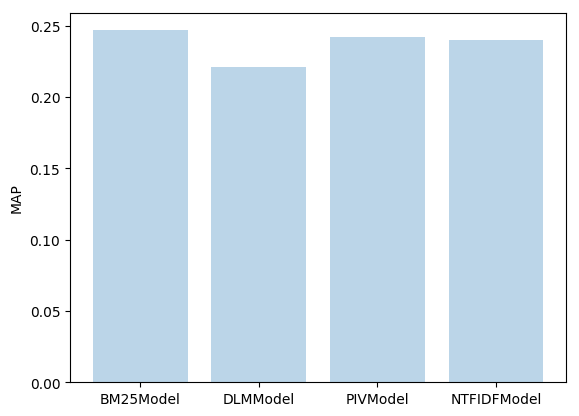

In [83]:
plt.rcdefaults()
y_pos = np.arange(len(models_list))

plt.bar(y_pos, result_list, align='center', alpha=0.3)
plt.xticks(y_pos, models_list)
plt.ylabel(ylabel)

plt.show()